In [62]:
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
import numpy as np

In [63]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #loading dataset

In [64]:
x_train = tf.keras.utils.normalize(x_train, axis=1)#nomrmalization helps in converging faster during training the neural network
x_test1 = tf.keras.utils.normalize(x_test, axis=1)

In [65]:
#building the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # resizes it to 1x784 matrix
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))#input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))#output layer

In [66]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
history = model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 195us/sample - loss: 0.2667 - accuracy: 0.9220
Epoch 2/3
60000/60000 [==============================] - 12s 197us/sample - loss: 0.1088 - accuracy: 0.9664
Epoch 3/3
60000/60000 [==============================] - 11s 182us/sample - loss: 0.0759 - accuracy: 0.9760


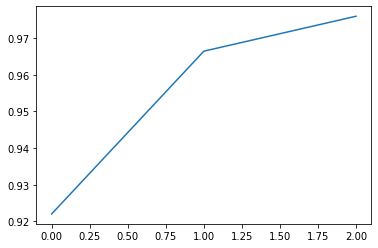

In [68]:
plt.plot(history.history['accuracy']) #accuracy graph
plt.show()

In [69]:
val_loss, val_acc = model.evaluate(x_test1, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss 
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 1s 79us/sample - loss: 0.1016 - accuracy: 0.9684
0.10155545451017096
0.9684


In [70]:
predictions = model.predict(x_test1) 

In [71]:
# prediction of the model
print(np.argmax(predictions[3])) #


0


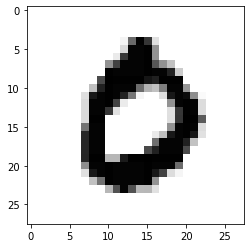

In [72]:
plt.imshow(x_test[3],cmap=plt.cm.binary) # actual output
plt.show()